<a href="https://colab.research.google.com/github/BossDevinator/IS_4482/blob/main/A10_Moore_Devan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASSIGNEMENT 10
##Association Rule Mining
###Devan Moore
###11/13/2024

##TASK 1:

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=aa9053fbff83e5c8d3c4d4122415e70494ad0fc69c412b22ab6eb5d1dea836fe
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import csv
from apyori import apriori
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget "https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/Walmart_baskets_1week_lst-1.csv"

--2024-11-13 17:18:21--  https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/Walmart_baskets_1week_lst-1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96621 (94K) [text/plain]
Saving to: ‘Walmart_baskets_1week_lst-1.csv’

Walmart_baskets_1we 100%[===================>]  94.36K  --.-KB/s    in 0.02s   

2024-11-13 17:18:21 (3.91 MB/s) - ‘Walmart_baskets_1week_lst-1.csv’ saved [96621/96621]



In [ ]:
with open('Walmart_baskets_1week_lst-1.csv', newline='') as f:
  reader = csv.reader(f)
  sns_baskets = list(reader)

##TASK 2:

In [ ]:
len(sns_baskets)

2000

In [ ]:
sns_baskets[0]

['FABRICS AND CRAFTS']

In [ ]:
sns_baskets[0:15]

[['FABRICS AND CRAFTS'],
 ['HARDWARE', 'PERSONAL CARE', 'PHARMACY OTC'],
 ['FROZEN FOODS', 'PRODUCE', 'SEAFOOD'],
 ['FROZEN FOODS'],
 ['LADIESWEAR'],
 ['FINANCIAL SERVICES'],
 ['FINANCIAL SERVICES'],
 ['CANDY', ' TOBACCO', ' COOKIES', 'DSD GROCERY', 'HOUSEHOLD PAPER GOODS'],
 ['BEAUTY'],
 ['FINANCIAL SERVICES', 'IMPULSE MERCHANDISE'],
 ['BRAS & SHAPEWEAR', 'PHARMACY OTC'],
 ['JEWELRY AND SUNGLASSES'],
 ['CANDY', ' TOBACCO', ' COOKIES', 'DSD GROCERY'],
 ['SHOES'],
 ['FINANCIAL SERVICES']]

In [ ]:
flattened_list = [item for sublist in sns_baskets for item in sublist]
flattened_list[0:15]

['FABRICS AND CRAFTS',
 'HARDWARE',
 'PERSONAL CARE',
 'PHARMACY OTC',
 'FROZEN FOODS',
 'PRODUCE',
 'SEAFOOD',
 'FROZEN FOODS',
 'LADIESWEAR',
 'FINANCIAL SERVICES',
 'FINANCIAL SERVICES',
 'CANDY',
 ' TOBACCO',
 ' COOKIES',
 'DSD GROCERY']

<Axes: >

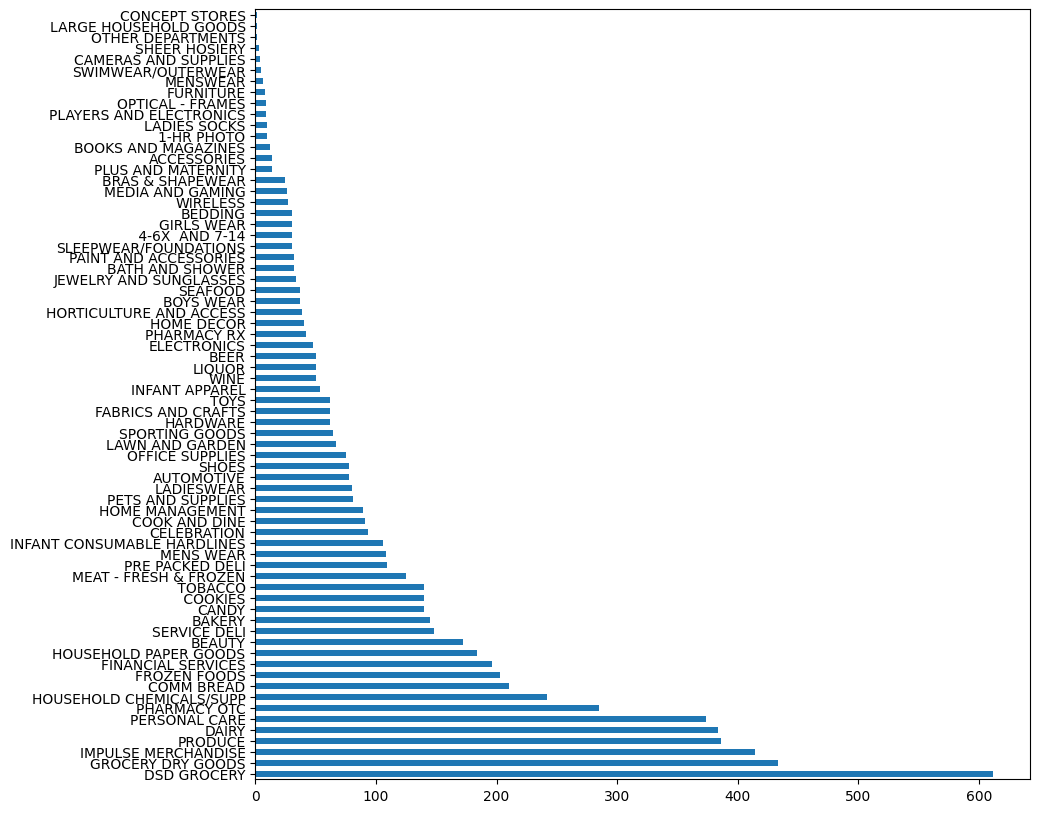

In [ ]:
pd.get_dummies(flattened_list).sum().sort_values(ascending=False).plot(kind='barh', figsize=(10,10))

##TASK 3:

In [ ]:
association_rules_15 = apriori(sns_baskets[0:100], min_support=0.048, min_confidence=0.5, min_lift=1.01)
association_results_15 = list(association_rules_15)
association_results_15

[RelationRecord(items=frozenset({' COOKIES', ' TOBACCO'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({' TOBACCO'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' COOKIES', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' COOKIES', 'DSD GROCERY'}), support=0.05, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({'DSD GROCERY'}), confidence=0.7142857142857143, lift=3.571428571428571)]),
 RelationRecord(items=frozenset({' TOBACCO', 'CANDY'})

In [ ]:
def parse_results(rules):
  for item in rules:
    pair = item[0]
    items = [x for x in pair]
    if len(items) >=2:
      print("Rule: " + items[0] + " -> " + items[1])
      print("Support: " + str(item[1]))
      print("Confidence: " + str(item[2][0][2]))
      print("Lift: " + str(item[2][0][3]))
      print("--------------")
    else:
      print("Rule with less than 2 items encountered. Skipping this rule.")

In [ ]:
parse_results(association_results_15)

Rule:  COOKIES ->  TOBACCO
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
--------------
Rule:  COOKIES -> CANDY
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
--------------
Rule:  COOKIES -> DSD GROCERY
Support: 0.05
Confidence: 0.7142857142857143
Lift: 3.571428571428571
--------------
Rule:  TOBACCO -> CANDY
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
--------------
Rule:  TOBACCO -> DSD GROCERY
Support: 0.05
Confidence: 0.7142857142857143
Lift: 3.571428571428571
--------------
Rule: DSD GROCERY -> CANDY
Support: 0.05
Confidence: 0.7142857142857143
Lift: 3.571428571428571
--------------
Rule: DAIRY -> DSD GROCERY
Support: 0.06
Confidence: 0.75
Lift: 3.75
--------------
Rule: HOUSEHOLD CHEMICALS/SUPP -> DSD GROCERY
Support: 0.05
Confidence: 0.5555555555555556
Lift: 2.7777777777777777
--------------
Rule: HOUSEHOLD PAPER GOODS -> DSD GROCERY
Support: 0.07
Confidence: 0.8750000000000001
Lift: 4.375
--------------
Rule: HOUSEHOLD CHEMICALS/SUPP -> PERSONAL CAR

While this is still a broad outlook on the baskets, we can begin to see a few patterns in shopping habits. And quite a few make sense such as a support of 0.05 with "Household Chemicals" and "Personal Care" as well as "Candy" and "Cookies." However, an interesting strong relationship we're seeing as of right now is between "Cookies" and "Tobacco."

##TASK 4:

In [ ]:
association_rules_5 = apriori(sns_baskets[0:100], min_support=0.07, min_confidence=0.1, min_lift=1.01)
association_results_5 = list(association_rules_5)
association_results_5

[RelationRecord(items=frozenset({' COOKIES', ' TOBACCO'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({' TOBACCO'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' COOKIES', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' TOBACCO', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' TOBACCO'}

In [ ]:
parse_results(association_results_5)

Rule:  COOKIES ->  TOBACCO
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
--------------
Rule:  COOKIES -> CANDY
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
--------------
Rule:  TOBACCO -> CANDY
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
--------------
Rule: HOUSEHOLD PAPER GOODS -> DSD GROCERY
Support: 0.07
Confidence: 0.35000000000000003
Lift: 4.375
--------------
Rule:  COOKIES ->  TOBACCO
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
--------------


Again, here we see a more refined list that "Tobacco" and "Cookies" have a very strong lift, meaning that it is not just a coincidence that people buy both tobacco and cookies.

##TASK 5:

In [ ]:
association_rules_2 = apriori(sns_baskets[0:100], min_support=0.07, min_confidence=1.0, min_lift=1.01, max_length=2)
association_results_2 = list(association_rules_2)
association_results_2

[RelationRecord(items=frozenset({' COOKIES', ' TOBACCO'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({' TOBACCO'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' COOKIES', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' COOKIES'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' COOKIES'}), confidence=1.0, lift=14.285714285714285)]),
 RelationRecord(items=frozenset({' TOBACCO', 'CANDY'}), support=0.07, ordered_statistics=[OrderedStatistic(items_base=frozenset({' TOBACCO'}), items_add=frozenset({'CANDY'}), confidence=1.0, lift=14.285714285714285), OrderedStatistic(items_base=frozenset({'CANDY'}), items_add=frozenset({' TOBACCO'}

In [ ]:
parse_results(association_results_2)

Rule:  COOKIES ->  TOBACCO
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
--------------
Rule:  COOKIES -> CANDY
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
--------------
Rule:  TOBACCO -> CANDY
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
--------------


Finally, we can narrow down the shopping habits with the highest coorelation, helping to illustrate strong habits. From the above example, we can see that Tobacco and Cookies & Candy and Cookies have the highest lift from the entire dataset.

##MISC

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/A10_Moore_Devan.ipynb" ./
!jupyter nbconvert --to html "A10_Moore_Devan.ipynb"

[NbConvertApp] Converting notebook A10_Moore_Devan.ipynb to html
[NbConvertApp] Writing 293895 bytes to A10_Moore_Devan.html
